In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import ptitprince as pt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in cleaned csv's for visualizations
whr_wdi_left = pd.read_csv('../data/whr_wdi_left_merge.csv')
left_wide = pd.read_csv('../data/whr_wdi_left_merge_wide.csv')
left_wide_advanced = pd.read_csv('../data/whr_wdi_left_merge_wide_advanced.csv')

print('CSVs read in successfully')

CSVs read in successfully


In [3]:
# Check data
print(whr_wdi_left.shape)
whr_wdi_left.head()

(14533, 15)


,Iso3,Country,Year,Happiness Rank,Happiness Score,GDP Contribution,Life Expectancy Contribution,Corruption Impact,series_name,value,Income Level,Region,longitude,latitude,iso2Code
0,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,GDP per capita (current US$),606.69,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
1,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,Current health expenditure per capita (current...,52.19,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
2,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,Current health expenditure (% of GDP),8.56,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
3,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,"Government expenditure on education, total (% ...",3.46,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
4,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,"Literacy rate, adult total (% of people ages 1...",31.45,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF


In [4]:
# Check data
print(left_wide.shape)
left_wide.head()

(1794, 17)


,Iso3,Country,Year,Happiness Rank,Happiness Score,Health Expenditure (% GDP),Health Expenditure (per capita),GDP per Capita,Education Expenditure (% GDP),Adult Literacy %,Primary School Enrollment %,Secondary School Enrollment %,Tertiary School Enrollment %,Income Level,Region,longitude,latitude
0,AFG,Afghanistan,2011,131,4.258,8.56,52.19,606.69,3.46,31.45,101.54,52.45,3.69,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
1,AFG,Afghanistan,2012,143,4.040,7.90,52.45,651.42,2.60,NaN,106.58,54.37,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
2,AFG,Afghanistan,2014,153,3.575,9.53,60.05,625.05,3.70,NaN,109.83,54.29,8.40,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
3,AFG,Afghanistan,2015,153,3.360,10.11,59.92,565.57,3.26,33.75,106.77,53.15,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
4,AFG,Afghanistan,2016,141,3.794,11.82,61.37,522.08,4.54,NaN,106.78,53.44,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228


In [5]:
# Check data
print(left_wide_advanced.shape)
left_wide_advanced.head()

(795, 20)


,Iso3,Country,Year,Happiness Rank,Happiness Score,GDP Contribution,Life Expectancy Contribution,Corruption Impact,Health Expenditure (% GDP),Health Expenditure (per capita),GDP per Capita,Education Expenditure (% GDP),Adult Literacy %,Primary School Enrollment %,Secondary School Enrollment %,Tertiary School Enrollment %,Income Level,Region,longitude,latitude
0,AFG,Afghanistan,2019,153,2.567,0.301,0.266,0.001,14.83,74.06,496.60,NaN,NaN,109.08,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
1,AFG,Afghanistan,2020,149,2.523,0.370,0.126,0.010,15.53,80.09,510.79,NaN,35.99,NaN,NaN,10.85,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
2,AFG,Afghanistan,2021,146,2.404,0.758,0.289,0.005,21.51,81.52,356.50,NaN,37.27,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
3,AFG,Afghanistan,2022,137,1.859,0.645,0.087,0.059,23.09,80.65,357.26,NaN,NaN,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
4,AFG,Afghanistan,2023,143,1.721,0.628,0.242,0.088,NaN,NaN,413.76,NaN,NaN,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228


🌍 Visualization – Global Happiness Scores Cholorpleth -- Purpose: Show the big picture first. ✅ Explanation: This is the opening visual. It sets the stage by showing which countries are happiest. It answers: “Where is happiness concentrated globally?”

In [6]:
# Print colormap/palette options
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

In [7]:
# Global happiness scores choropleth map using Plotly
fig = px.choropleth(
    whr_wdi_left,
    locations='Country',
    locationmode='country names',
    color='Happiness Score',
    color_continuous_scale='turbo_r',
    #color_continuous_scale='jet_r',
    #color_continuous_scale='spectral',
    title='Global Happiness'
)

# Make the layout bigger and remove unnecessary gaps
fig.update_layout(
    width=1000,
    height=600,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title='Happiness Score'
    ),
    font=dict(
        family='Century Gothic, Arial, sans-serif',
        size=20,
        color='black'
    )
)

# Show heatmap
fig.show()

💰 Visualization – Wealth vs Happiness Scatterchart -- Purpose: Show that richer countries tend to be happier. ✅ Explanation: This simple scatterplot reveals the general upward trend: countries with higher GDP per person tend to report higher happiness.

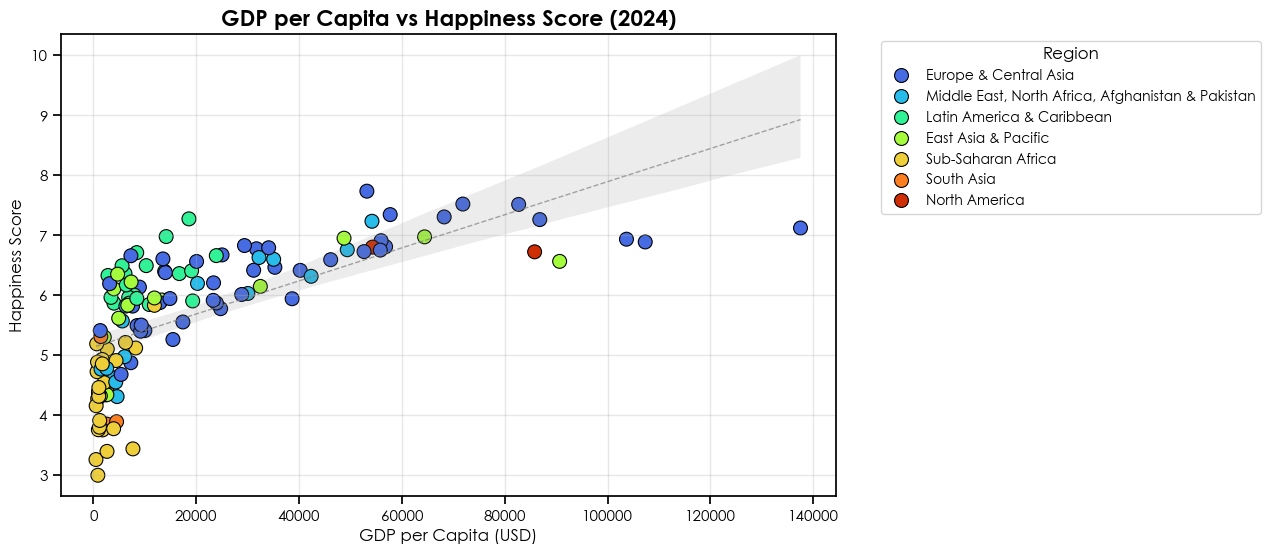

In [8]:
# Filter single year
df_gdp_2024 = left_wide[left_wide['Year'] == 2024]

# Scatterplot gdp vs happiness
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.scatterplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    hue='Region',
    #size='Happiness Score',
    s=100,
    palette='turbo',
    edgecolor='black'
    )

# Add a trendline
sns.regplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
    )

# Titles and labels
plt.title('GDP per Capita vs Happiness Score (2024)', fontsize=16, weight='bold')
plt.xlabel('GDP per Capita (USD)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
#plt.tight_layout()

# Show plot
plt.show()

🪵 📈 Visualization – Log-Scale GDP vs Happiness Scatterchart -- Purpose: Reveal hidden patterns between wealth and happiness by reducing the skew caused by extremely rich countries. ✅ Explanation: Applying a log scale spreads out the low- and middle-income countries, making it easier to see how incremental increases in income affect happiness at different economic levels. It highlights diminishing returns — big jumps in happiness happen early, while very rich countries cluster together with smaller gains. -- Not used in presentation.

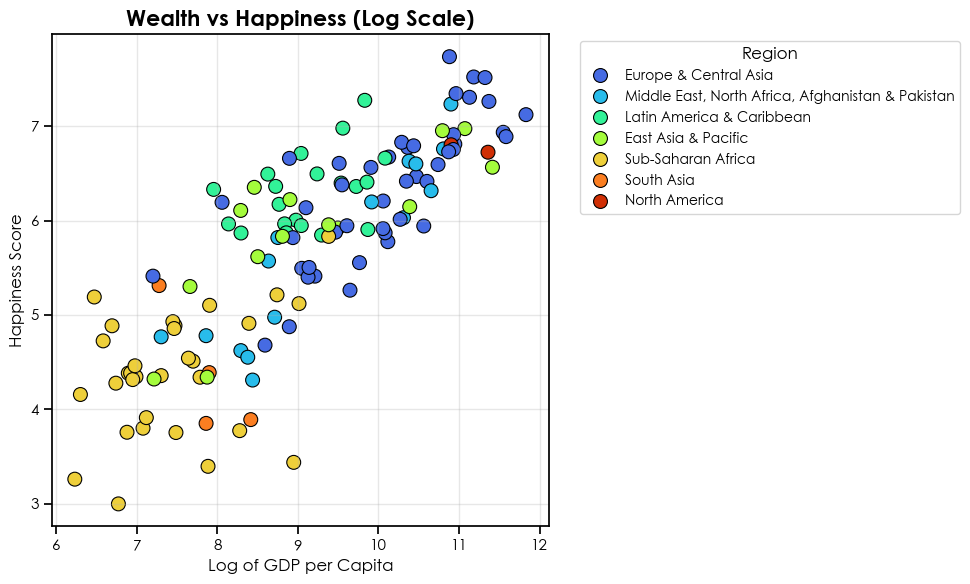

In [9]:
# Log scale gdp vs happiness
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.scatterplot(
    data=df_gdp_2024,
    x=np.log(df_gdp_2024['GDP per Capita']),
    y='Happiness Score',
    hue='Region',
    s=100,
    palette='turbo',
    edgecolor='black'
    )

# Titles and labels
plt.title('Wealth vs Happiness (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Log of GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

📉 Visualization – Diminishing Returns of Money Linechart -- Purpose: Show that after a certain point, more money doesn’t equal more happiness. ✅ Explanation: This line will rise and then flatten — showing where happiness growth slows with income.

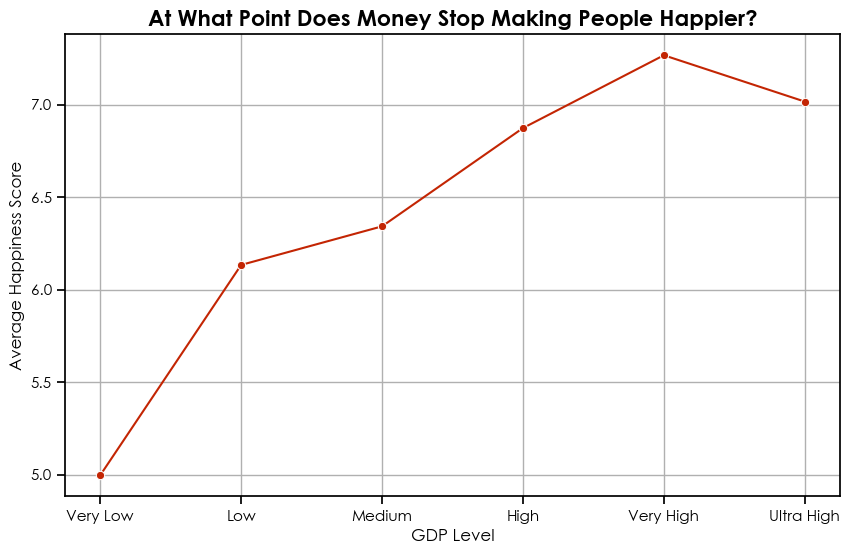

In [10]:
# Create GDP bins
df_gdp_2024['GDP_bins'] = pd.cut(df_gdp_2024['GDP per Capita'], 
                        bins=[0, 10000, 20000, 40000, 60000, 80000, 100000], 
                        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High'])

# Group by those bins and calculate mean happiness
avg_gdp = df_gdp_2024.groupby('GDP_bins', observed=False)['Happiness Score'].mean().reset_index()

# Make sure the bins are ordered correctly
avg_gdp['GDP_bins'] = pd.Categorical(avg_gdp['GDP_bins'], 
                                     categories=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High'], 
                                     ordered=True)

# Lineplot of gdp level using bins
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')

# Pick a color from the Turbo colormap (0 → 1) -- adjust 0.0–1.0 to get different colors
turbo_color = cm.turbo(0.9)

sns.lineplot(
    data=avg_gdp,
    x='GDP_bins',
    y='Happiness Score',
    marker='o',
    color=turbo_color
    )

# Title and labels
plt.title('At What Point Does Money Stop Making People Happier?', fontsize=16, weight='bold')
plt.xlabel('GDP Level', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.grid(True)
#plt.tight_layout()

# Show plot
plt.show()

🧬 Visualization – Health Expenditure (% GDP) vs Happiness Scatterplot -- Purpose: Compare how health expenditure affects happiness. ✅ Explanation: These show how happiness increases with better health spending — you’ll usually see a positive, fairly linear trend.

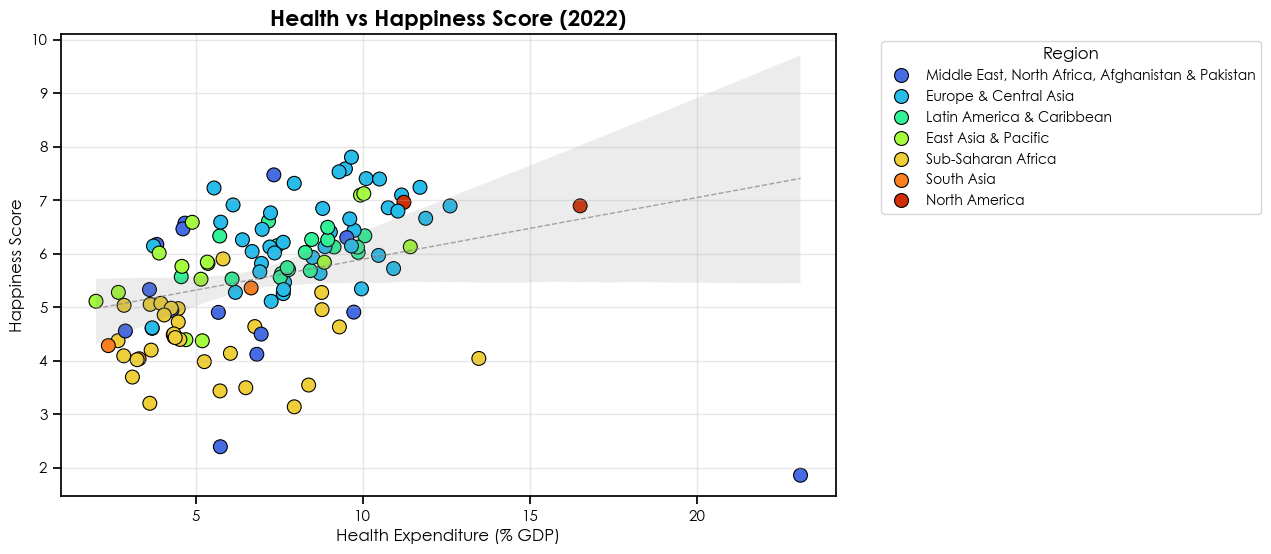

In [11]:
# Filter for 2022 (2024 has no data)
df_health_2022 = left_wide[left_wide['Year'] == 2022]

# Scatterplot health expenditure vs happiness
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.scatterplot(
    data=df_health_2022, x='Health Expenditure (% GDP)', y='Happiness Score',
    hue='Region',
    #size='GDP per Capita',
    s=100,
    palette='turbo',
    edgecolor='black'
)

# Add a trendline
sns.regplot(
    data=df_health_2022,
    x='Health Expenditure (% GDP)',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Titles and labels
plt.title('Health vs Happiness Score (2022)', fontsize=16, weight='bold')
plt.xlabel('Health Expenditure (% GDP)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)
#plt.tight_layout()

# Show plot
plt.show()

🎓 Visualization — Education Expenditure (% GDP) vs Happiness Scatterplot -- Purpose: Compare how education expenditure affects happiness. ✅ Explanation: Lets you visually compare whether higher education spending aligns with higher happiness levels. You’ll typically see a positive but moderate upward trend—suggesting that education investment supports well-being.

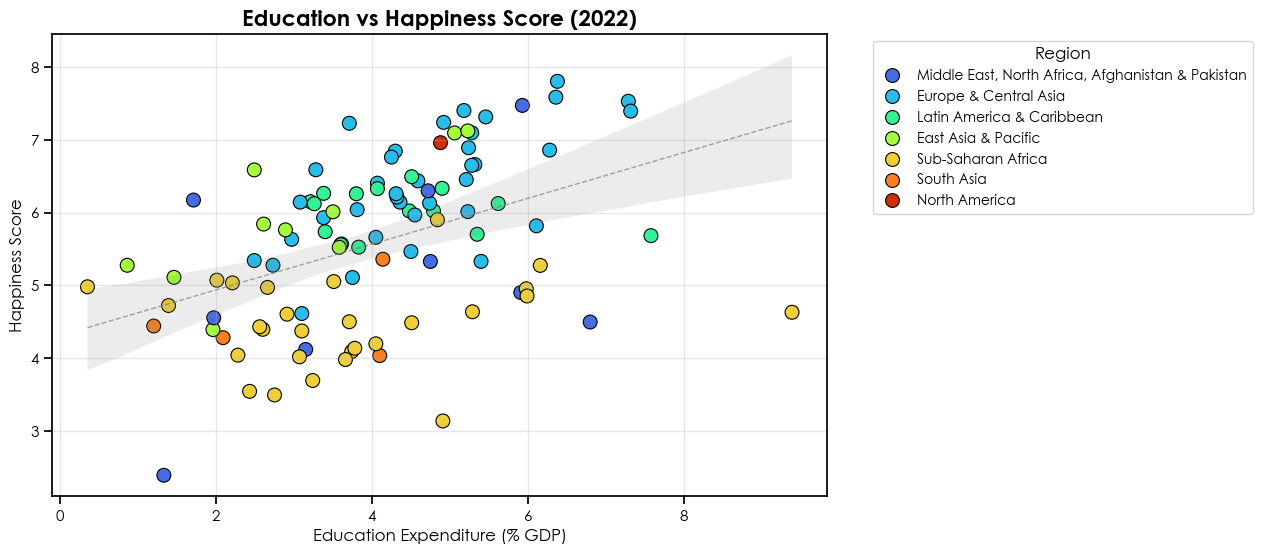

In [12]:
# Filter for 2021 (best recent year for data)
df_edu_2022 = left_wide[left_wide['Year'] == 2022]

# Scatterplot education vs happiness
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.scatterplot(
    data=df_edu_2022,
    x='Education Expenditure (% GDP)',
    y='Happiness Score',
    hue='Region',
    s=100,
    palette='turbo',
    edgecolor='black'
)

# Add a trendline
sns.regplot(
    data=df_edu_2022,
    x='Education Expenditure (% GDP)',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Titles and labels
plt.title('Education vs Happiness Score (2022)', fontsize=16, weight='bold')
plt.xlabel('Education Expenditure (% GDP)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)
#plt.tight_layout()

# Show plot
plt.show()

📊 Visualization – Happiness Factors Correlation Heatmap -- Purpose: Visually compare how strongly each factor is related to happiness. ✅ Explanation: This gives a snapshot of how strong each relationship is. You’ll likely see all three (GDP, Health, Education) strongly linked to happiness.

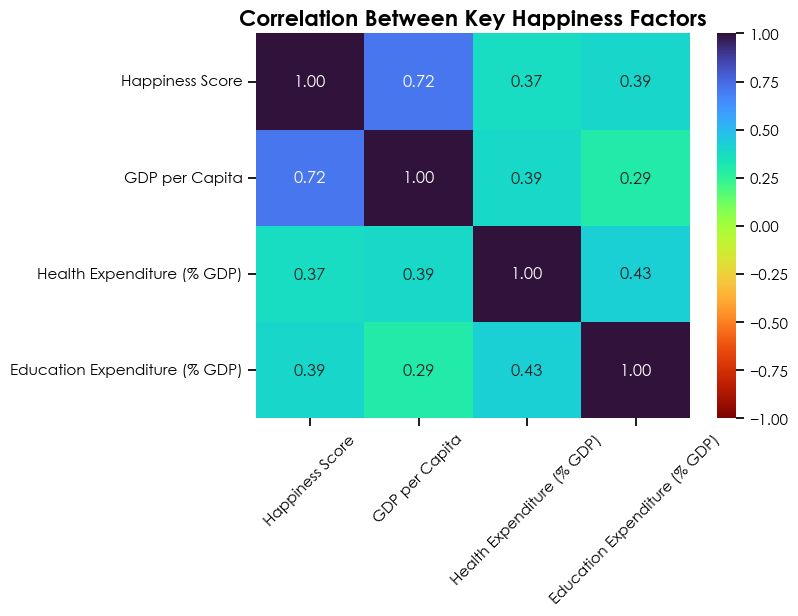

In [13]:
corr = left_wide[['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']].corr()

# Correlation heatmap of key happiness factors
plt.figure(figsize=(7,5))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.heatmap(corr, annot=True, cmap='turbo_r', fmt=".2f", vmin=-1, vmax=1)

# Titles and labels
plt.title('Correlation Between Key Happiness Factors', fontsize=16, weight='bold')
plt.xticks(rotation=45)

# Show correlation heatmap
plt.show()

🥇 Visualization – Top vs Bottom Countries Grouped Comparison Barchart -- Purpose: Show contrast in happiness drivers between the happiest and least happy countries. ✅ Explanation: Groups top5 and bottom5 countries and compares factors for each group. Shows who’s doing best, who’s struggling, and how big the gap is.

In [14]:
# Metrics to compare
metrics = ['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']

# Average by country
country_means = left_wide.groupby('Country', as_index=False)[metrics].mean()

# Identify top 5 and bottom 5 countries by happiness
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

# Add a 'Group' label for clarity
top5['Group'] = 'Top 5 Happiest'
bottom5['Group'] = 'Bottom 5 Least Happy'

# Combine top and bottom 5
top_bottom = pd.concat([top5, bottom5])

# Melt for multi-metric barplot
top_bottom_melted = top_bottom.melt(id_vars=['Country', 'Group'], 
                                    value_vars=metrics, 
                                    var_name='Metric', 
                                    value_name='Value')

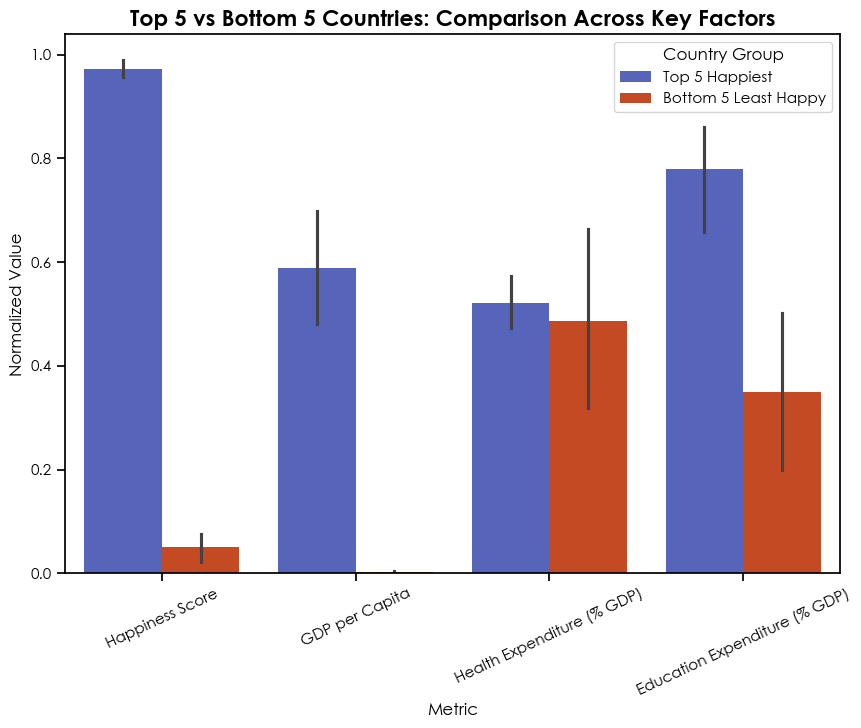

In [15]:
# Normalize all metrics
scaler = MinMaxScaler()
country_means[metrics] = scaler.fit_transform(country_means[metrics])

# Identify groups and melt
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')
top5['Group'] = 'Top 5 Happiest'
bottom5['Group'] = 'Bottom 5 Least Happy'
top_bottom = pd.concat([top5, bottom5])
top_bottom_melted = top_bottom.melt(id_vars=['Country', 'Group'],
                                    value_vars=metrics,
                                    var_name='Metric',
                                    value_name='Value')

# Pick two colors from the Turbo palette (values between 0 and 1)
color_top = cm.turbo(0.1)   # purple-blue
color_bottom = cm.turbo(0.85)  # red-yellow

custom_palette = {
    'Top 5 Happiest': color_top,
    'Bottom 5 Least Happy': color_bottom
}

# Top5 bottom5 barchart
plt.figure(figsize=(10, 7))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.barplot(
    data=top_bottom_melted,
    x='Metric',
    y='Value',
    hue='Group',
    palette=custom_palette
)

# Titles and labels
plt.title('Top 5 vs Bottom 5 Countries: Comparison Across Key Factors', fontsize=16, weight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.legend(title='Country Group')
plt.xticks(rotation=25)
#plt.tight_layout()

# Show chart
plt.show()

In [16]:
# List of metrics to include
metrics = ['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']

# Average values per country for all metrics
country_means = left_wide.groupby('Country', as_index=False)[metrics].mean()

# Get top 5 and bottom 5 countries by Happiness Score
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

print("Top 5:\n", top5[['Country', 'Happiness Score']])
print("\nBottom 5:\n", bottom5[['Country', 'Happiness Score']])

Top 5:
          Country  Happiness Score
46       Finland         7.646923
38       Denmark         7.605462
104       Norway         7.462154
59       Iceland         7.460231
130  Switzerland         7.429538

Bottom 5:
                       Country  Happiness Score
0                 Afghanistan         3.078000
124               South Sudan         3.269400
26   Central African Republic         3.314857
22                    Burundi         3.370000
116                    Rwanda         3.510700


↗️ ↘️ Visualization - Top5 countries vs bottom5 countries by happiness scores -- Not used in presentation.

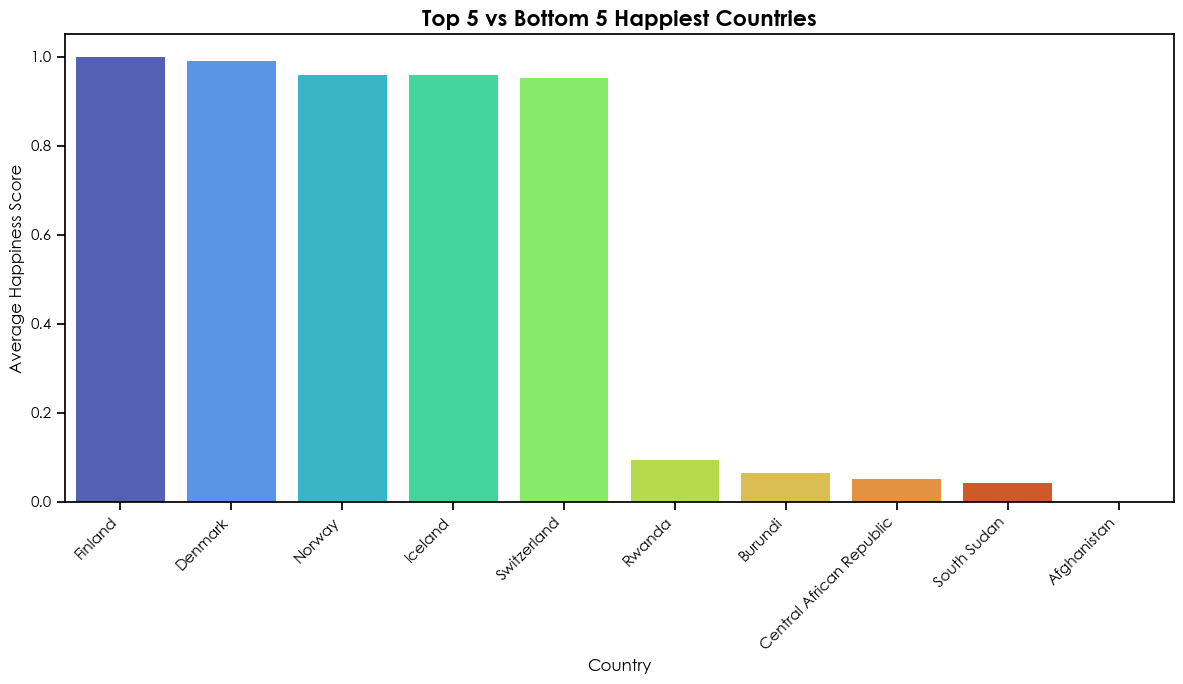

In [17]:
# Combine top and bottom 5
#top_bottom = pd.concat([top5, bottom5])
top_bottom = top_bottom.sort_values('Happiness Score', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 7))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.barplot(
    data=top_bottom,
    x='Country',
    y='Happiness Score',
    palette='turbo'
)

# Titles and labels
plt.title('Top 5 vs Bottom 5 Happiest Countries', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show chart
plt.show()

🕸️ Visualization – Radar (Spider) Chart -- Purpose: Show factor balance between happy and unhappy countries. ✅ Explanation: You’ll see that happy countries have balanced strength in all three areas — unhappy countries are weak across all or most.

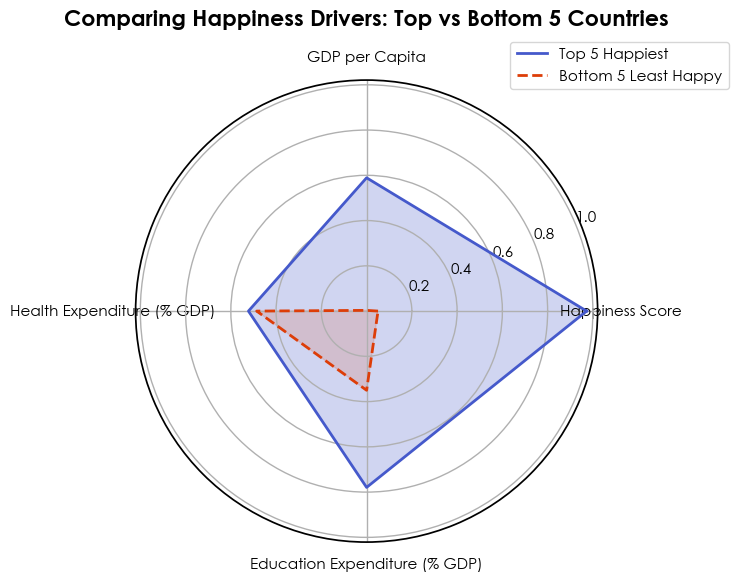

In [18]:
# Normalize metrics per column across all countries
scaler = MinMaxScaler()
country_means[metrics] = scaler.fit_transform(country_means[metrics])  # Correct normalization

# Select top/bottom groups after normalization
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

# Calculate mean for each group
top_means = top5[metrics].mean()
bottom_means = bottom5[metrics].mean()

# Create DataFrame for radar chart (no second normalization!)
data = pd.DataFrame({'Top 5': top_means, 'Bottom 5': bottom_means})

labels = list(data.index)
top_values = data['Top 5'].tolist() + [data['Top 5'][0]]
bottom_values = data['Bottom 5'].tolist() + [data['Bottom 5'][0]]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist() + [0]

# Happiness drivers radar chart
plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
ax = plt.subplot(111, polar=True)

color_top5 = plt.cm.turbo(0.1)
color_bottom5 = plt.cm.turbo(0.85)

ax.plot(angles, top_values, label='Top 5 Happiest', color=color_top5, linewidth=2)
ax.fill(angles, top_values, color=color_top5, alpha=0.25)
ax.plot(angles, bottom_values, label='Bottom 5 Least Happy', linestyle='dashed', color=color_bottom5, linewidth=2)
ax.fill(angles, bottom_values, color=color_bottom5, alpha=0.15)

# Title and legend
plt.xticks(angles[:-1], labels)
plt.title('Comparing Happiness Drivers: Top vs Bottom 5 Countries', fontsize=16, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show chart
plt.show()

🧠 Visualization – “What If” Simulation -- Purpose: Predict how happiness might improve if a struggling country improved health or education. ✅ Explanation: This gives your final, story-driven insight — showing how improving life expectancy or education could boost happiness even without big GDP growth.

In [19]:
# Count nan values
left_wide[['Country', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)', 'Happiness Score']].isna().sum()

Country                            0
GDP per Capita                     7
Health Expenditure (% GDP)       260
Education Expenditure (% GDP)    418
Happiness Score                    0
dtype: int64

In [20]:
# Drop nan values to use df in model
df_model = left_wide[['Country', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)', 'Happiness Score']].dropna()

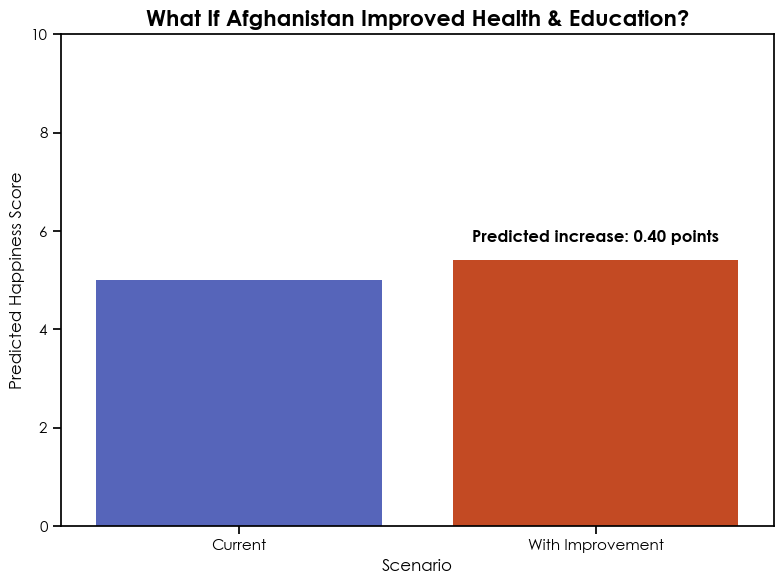

Predicted increase: 0.40 points


In [ ]:
X = df_model[['GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']]
y = df_model['Happiness Score']

model = LinearRegression().fit(X, y)

# Pick a low-happiness country
country = df_model[df_model['Country'] == 'Afghanistan'].copy()  # Change country name if needed

# Predict current happiness
current_pred = model.predict(country[X.columns])[0]

# Simulate a 50% increase in health and education
country_improved = country.copy()
country_improved['Health Expenditure (% GDP)'] *= 1.50
country_improved['Education Expenditure (% GDP)'] *= 1.50
improved_pred = model.predict(country_improved[X.columns])[0]

# Plot before/after
before_after = pd.DataFrame({
    'Scenario': ['Current', 'With Improvement'],
    'Predicted Happiness Score': [current_pred, improved_pred]
})

# Pick turbo colors by value between 0 and 1
color_before = cm.turbo(0.1)
color_after  = cm.turbo(0.85)
custom_palette = [color_before, color_after]

# Barchart showing 'what if' scenario
plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
ax = sns.barplot(
    data=before_after,
    x='Scenario',
    y='Predicted Happiness Score',
    palette=custom_palette
    )

# --- Add predicted increase as text above the second bar ---
increase = improved_pred - current_pred
ax.text(
    x=1,  # second bar ("With Improvement")
    y=improved_pred + 0.3,  # slightly above the bar
    s=f"Predicted increase: {increase:.2f} points",
    ha='center', va='bottom',
    fontsize=12,
    weight='bold',
    fontname='Century Gothic',
    color='black'
)

# Title and labels
plt.title(f"What If {country.iloc[0]['Country']} Improved Health & Education?", fontsize=16, weight='bold')
plt.ylim(0, 10)
plt.tight_layout()

# Show chartt
plt.show()

print(f"Predicted increase: {improved_pred - current_pred:.2f} points")

In [22]:
if len(country) == 0:
    print("Country not found!")
else:
    current_pred = model.predict(country[X.columns])[0]

In [23]:
print(df_model['Country'].unique())

['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bosnia and Herzegovina'
 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' "Cote d'Ivoire"
 'Cameroon' 'Colombia' 'Comoros' 'Costa Rica' 'Cyprus' 'Czechia' 'Germany'
 'Djibouti' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Spain'
 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'United Kingdom'
 'Georgia' 'Ghana' 'Guinea' 'Greece' 'Guatemala' 'Guyana' 'Honduras'
 'Croatia' 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iceland'
 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan' 'Kenya'
 'Cambodia' 'Kuwait' 'Lao PDR' 'Lebanon' 'Liberia' 'Sri Lanka' 'Lesotho'
 'Lithuania' 'Luxembourg' 'Latvia' 'Morocco' 'Moldova' 'Madagascar'
 'Maldives' 'Mexico' 'Mali' 'Malta' 'Myanmar' 'Mongolia' 'Mozambique'
 'Mauritania' 'Maurit

🧩 Visualization – Optional Finisher: Combined Insights Pairplot -- Purpose: Summarize all relationships together. ✅ Explanation: This grid of scatterplots shows all pairwise relationships — good for appendix slides or supporting your model insights. -- Not used in presentation.

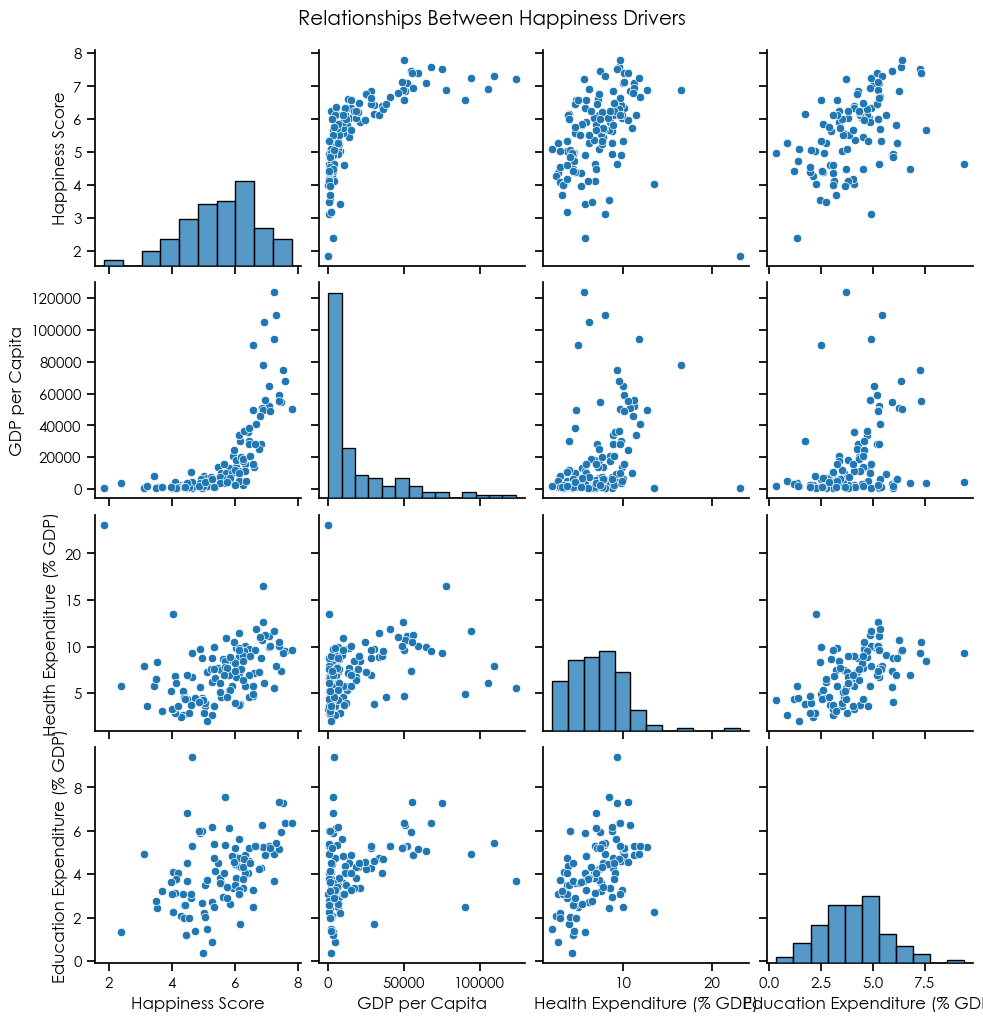

In [24]:
# Show all pairwise relationships in pairplot chart
sns.pairplot(df_health_2022[['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']])
sns.set_context('notebook')
plt.rcParams['font.family'] = 'Century Gothic'
plt.suptitle('Relationships Between Happiness Drivers', y=1.02)

plt.show()

⌛ Visualization – Regional Happiness Over Time -- Purpose: Show how different world regions have changed in happiness across the years. ✅ Explanation: This line chart highlights long-term trends, revealing which regions are improving, declining, or staying stable. It helps compare regional trajectories and spot patterns such as steady growth, sharp dips, or widening gaps between regions. 

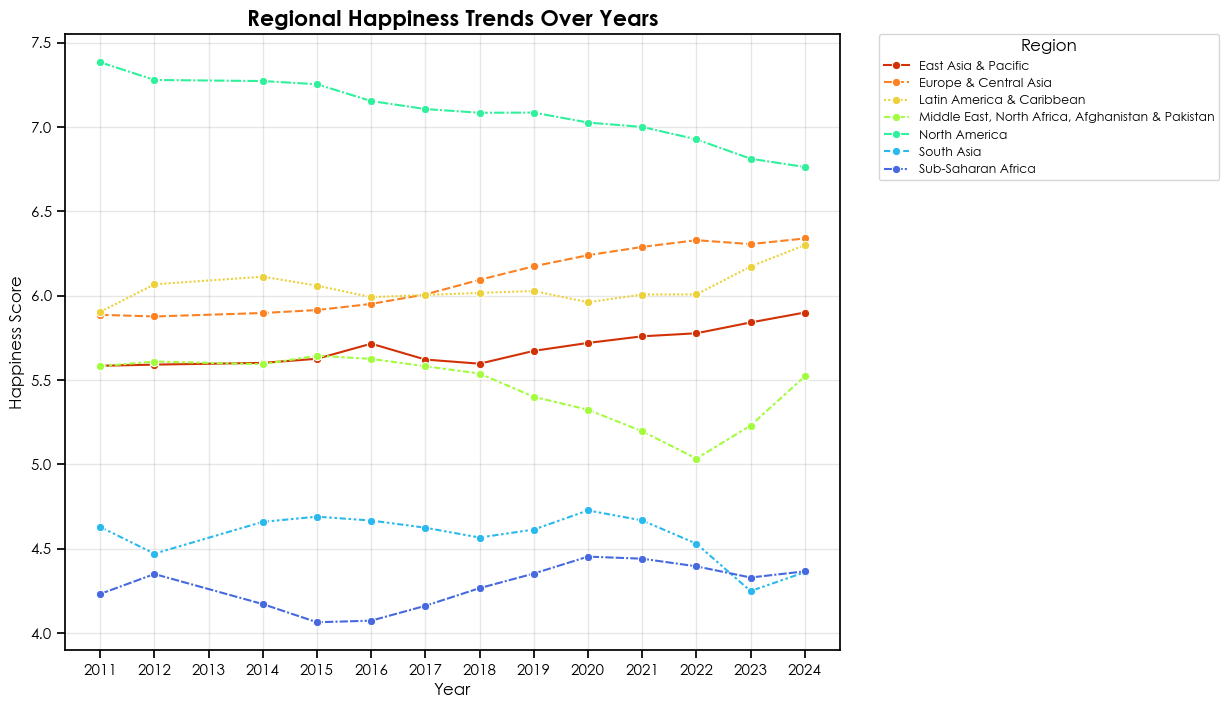

In [33]:
# Average Happiness over years by Region
df_region_year = left_wide.groupby(['Year','Region'])['Happiness Score'].mean().reset_index()

# Line chart of regional happiness over years
plt.figure(figsize=(10,8))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
sns.lineplot(
    data=df_region_year,
    x='Year',
    y='Happiness Score',
    hue='Region',
    marker='o',
    palette='turbo_r',
    style='Region'
    )

# Titles and labels
plt.title('Regional Happiness Trends Over Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(ticks=range(2011, 2025))  # include 2024
plt.grid(alpha=0.3)
#plt.tight_layout()

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')

# Show chart
plt.show()

🌎 Visualization – Average Regional Happiness (2024) Horizontal Barchart -- Purpose: Compare how happy different world regions are in the most recent year. ✅ Explanation: This horizontal bar chart ranks regions by their average happiness score in 2024. It quickly highlights which regions are performing the best, which are lagging behind, and how large the gaps are between them—making it easy to see global disparities at a glance.


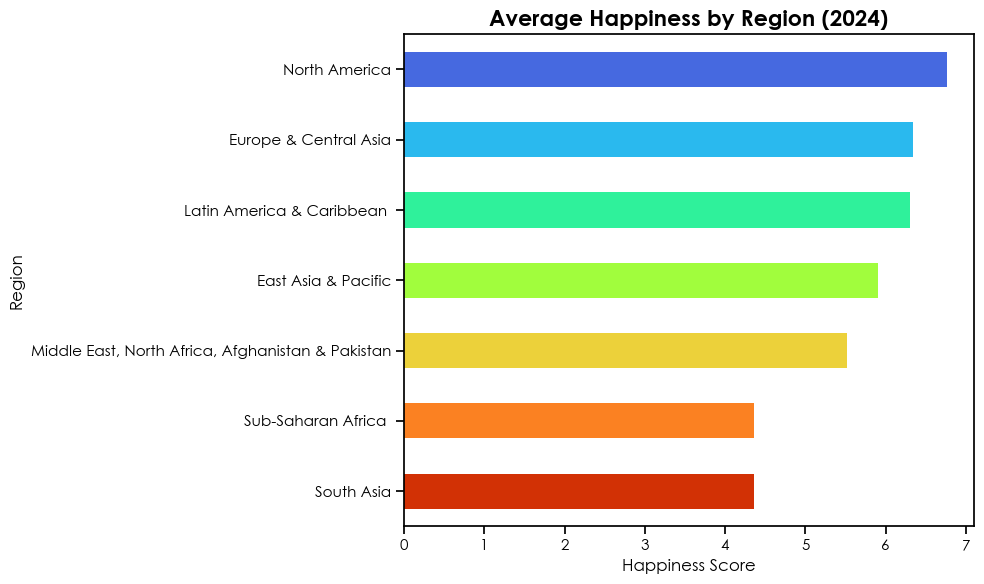

In [26]:
region_avg_happiness = df_gdp_2024.groupby('Region')['Happiness Score'].mean().sort_values()

# Horizontal bar chart of average happiness by region in 2024
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Century Gothic'
sns.set_context('notebook')
#region_avg_happiness.plot(kind='barh', colormap='viridis')
palette = sns.color_palette('turbo_r', n_colors=len(region_avg_happiness))
region_avg_happiness.plot(kind='barh', color=palette)

# Titles and labels
plt.title('Average Happiness by Region (2024)', fontsize=16, weight='bold')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()

# Show chart
plt.show()

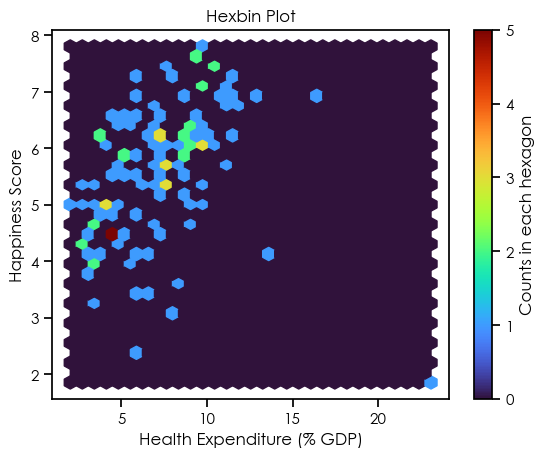

In [ ]:
# Hexbin Plot for two continuous columns
plt.hexbin(
    df_edu_2022['Health Expenditure (% GDP)'],
    df_edu_2022['Happiness Score'],
    gridsize=30,
    cmap='turbo'
)
plt.ylabel("Happiness Score")
plt.xlabel("Health Expenditure (% GDP)")
plt.title("Hexbin Plot")
plt.colorbar(label='Counts in each hexagon')
plt.show()

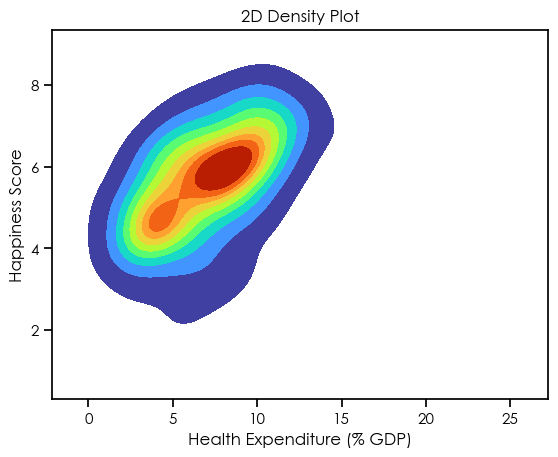

In [ ]:
# 2D Density Plot for two continuous columns
sns.kdeplot(
    y=df_edu_2022['Happiness Score'],
    x=df_edu_2022['Health Expenditure (% GDP)'],
    fill=True,
    cmap='turbo'
)
plt.ylabel("Happiness Score")
plt.xlabel("Health Expenditure (% GDP)")
plt.title("2D Density Plot")
plt.show()

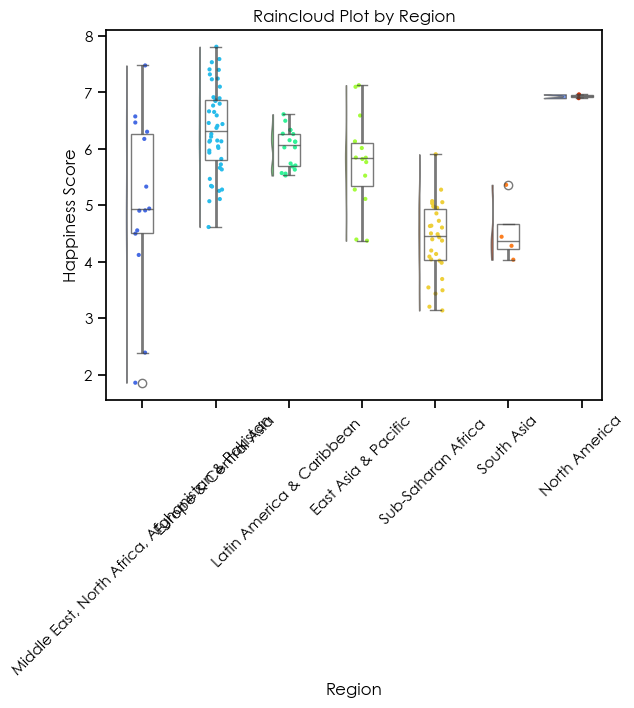

In [44]:
# Raincloud Plot comparing Happiness Score by Region
ax = pt.RainCloud(
    x='Region',                       # Category on x-axis
    y='Happiness Score',               # Data to plot
    data=df_edu_2022,                  # DataFrame to use
    palette='turbo',                   # Use turbo colormap
    bw=0.3,                            # Smoothing for violin
    alpha=0.7,                         # Transparency
    width_viol=0.6,
    width_box=0.3
)
plt.ylabel("Happiness Score")
plt.title("Raincloud Plot by Region")
plt.xticks(rotation=45)
plt.show()